In [14]:
import numpy as np
import scipy as sp
import pandas as pd
import pysindy as ps
import matplotlib.pyplot as plt
import warnings

from CORE import *
from analysis import *
from preprocessing import *

## 1. Test differential algorithm with Lorenz

In [15]:
def fTheta(X, u):
    X = X.T; u = u.T
    return np.c_[(
        np.ones_like(X[0]),
        X[0], X[1], X[2],
        X[0]*X[0], X[1]*X[1], X[2]*X[2], 
        X[0]*X[1], X[0]*X[2], X[1]*X[2], 
    )]

feature_name_list = ["1", "x", "y", "z", "x^2", "y^2", "z^2", "x y", "x z", "y z"]
var_list = ["x", "y", "z"]

X, t = generate_data(10, 10/0.002, "lorenz")
X_dot = ps.SmoothedFiniteDifference()(X, t)
Theta = fTheta(X, u = np.zeros(1))

print("Denoised: Without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]


#####################
X = add_noise(X, 0.05)
X_dot = ps.SmoothedFiniteDifference()(X, t)
Theta = fTheta(X, u = np.zeros(1))

print("\n5% Noise: Without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]


print("\n5% Noise: With ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=300, n_features_to_drop=1,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

Denoised: Without ensembling
[1.00] x_dot = +   -10.00 x +    10.00 y 
[1.00] y_dot = +    25.54 x +    -0.95 x z 
[1.00] z_dot = +    -2.67 z +     1.00 x y 


[0.91] x_dot = +   -10.00 x +    10.00 y 
[0.91] y_dot = +    25.54 x +    -0.95 x z 
[0.91] z_dot = +    -2.67 z +     1.00 x y 

5% Noise: Without ensembling
[-1.41] x_dot = +     3.91 y +    -0.27 x z +     0.16 y z 
[-0.03] y_dot = +    24.84 x +    -0.93 x z 
[0.31] z_dot = +    -2.64 z +     0.99 x y 


[0.76] x_dot = +     3.92 y +     0.00 z^2 +    -0.27 x z +     0.16 y z 
[0.76] y_dot = +    25.47 x +    -0.93 x z +    -0.02 y z 
[0.76] z_dot = +    -2.64 z +     0.99 x y 

5% Noise: With ensembling
[-1.43] x_dot = +    -9.41 x +     9.52 y 
[-0.03] y_dot = +    24.84 x +    -0.93 x z 
[0.31] z_dot = +    -2.64 z +     0.99 x y 


[0.78] x_dot = +     3.91 y +    -0.27 x z +     0.16 y z 
[0.78] y_dot = +    25.47 x +    -0.93 x z +    -0.02 y z 
[0.78] z_dot = +    -2.64 z +     0.99 x y +     0.00 y z 


[None, None, None]

## 2. Test weak form algorithm with Lorenz

In [16]:
X, t = generate_data(10, 10/0.002, "lorenz")
Theta = fTheta(X, u = np.zeros(1))
Theta_sm, X_sm = compute_weak_forms(Theta, X, t)
Theta_sm, X_sm = windowed_generation(Theta, X, t, 5000, 100)

print("Denoised: Weak without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta_sm, fTheta, X_sm, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

#####################
X = add_noise(X, 0.15)
Theta = fTheta(X, u = np.zeros(1))
Theta_sm, X_sm = compute_weak_forms(Theta, X, t)

print("\n15% Noise: Weak without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta_sm, fTheta, X_sm, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

print("\n15% Noise: Weak with ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta_sm, fTheta, X_sm, X, t, 
                                n_bootstraps=300, n_features_to_drop=1,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

Denoised: Weak without ensembling
[1.00] x_dot = +   -10.02 x +    10.01 y 
[1.00] y_dot = +    25.06 x +    -0.93 x z 
[1.00] z_dot = +    -2.67 z +     1.00 x y 


[0.92] x_dot = +   -10.02 x +    10.01 y 
[0.92] y_dot = +    25.06 x +    -0.93 x z 
[0.92] z_dot = +    -2.67 z +     1.00 x y 

15% Noise: Weak without ensembling
[0.90] x_dot = +    -9.26 x +     9.45 y +     0.06 z 
[0.94] y_dot = +    25.42 x +    -0.02 z +    -0.94 x z 
[0.93] z_dot = +    -2.61 z +     0.97 x y 


[0.41] x_dot = +    -9.26 x +     9.45 y +     0.06 z 
[0.41] y_dot = +    25.42 x +    -0.02 z +    -0.94 x z 
[0.41] z_dot = +    -2.61 z +     0.97 x y 

15% Noise: Weak with ensembling
[0.70] x_dot = +     4.89 y +    -0.18 x z 
[0.94] y_dot = +    -0.49 1 +    25.44 x +    -0.94 x z 
[0.93] z_dot = +    -2.61 z +     0.97 x y 


[0.50] x_dot = +     6.88 y +     0.01 x^2 +    -0.25 x z 
[0.50] y_dot = +    25.54 x +    -0.22 z +     0.01 z^2 +    -0.94 x z 
[0.50] z_dot = +    -2.61 z +     0.97 x y 

[None, None, None]

## 3. Test algorithm with underdamped oscillator

Denoised: Without ensembling
[1.00] x_dot = +     1.00 v 
[0.95] v_dot = +    -8.65 x 


[1.00] x_dot = +     1.00 v 
[1.00] v_dot = +    -9.00 x +    -0.60 v 

Denoised: Weak with ensembling
[1.00] x_dot = +     1.00 v 
[0.95] v_dot = +    -8.99 x 


[1.00] x_dot = +     1.00 v 
[1.00] v_dot = +    -9.01 x +    -0.61 v 


[None, None]

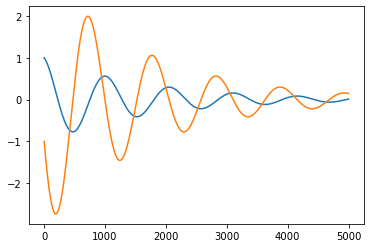

In [17]:
def fTheta(X, u):
    X = X.T; u = u.T
    return np.c_[(
        np.ones_like(X[0]),
        X[0], X[1],
        X[0]*X[0], X[1]*X[1], 
        X[0]*X[1],
    )]

feature_name_list = ["1", "x", "v", "x^2", "v^2", "x v"]
var_list = ["x", "v"]

X, t = generate_data(10, 10/0.002, "harm_osc", xi=0.1); plt.plot(X)
X_dot = ps.SmoothedFiniteDifference()(X, t)
Theta = fTheta(X, u = np.zeros(1))
Theta_sm, X_sm = compute_weak_forms(Theta, X, t)
Theta_sm, X_sm = windowed_generation(Theta, X, t, 5000, 100)

print("Denoised: Without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]



print("\nDenoised: Weak with ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta_sm, fTheta, X_sm, X, t, 
                                n_bootstraps=300, n_features_to_drop=1,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]


## 4. Test algorithm with modulated Lotka-Volterra

LOW (5%) MODULATION
Denoised: Without ensembling
[0.84] ni_dot = +     0.67 ni +    -0.99 ni nn 
[0.66] nn_dot = +    -0.33 nn +     0.99 ni nn 


[0.98] ni_dot = +     0.67 ni +    -0.99 ni nn 
[0.98] nn_dot = +    -0.33 nn +     0.99 ni nn 

Denoised: With ensembling
[0.84] ni_dot = +     0.67 ni +    -0.99 ni nn 
[0.66] nn_dot = +    -0.33 nn +     0.99 ni nn 


[0.99] ni_dot = +     0.67 ni +    -0.99 ni nn 
[0.99] nn_dot = +     0.01 ni +    -0.34 nn +     0.01 nn^2 +     0.98 ni nn 

Denoised: Weak without ensembling
[1.00] ni_dot = +     0.66 ni +    -0.99 ni nn 
[1.00] nn_dot = +    -0.34 nn +     1.00 ni nn 


[0.98] ni_dot = +     0.66 ni +    -0.99 ni nn 
[0.98] nn_dot = +    -0.34 nn +     1.00 ni nn 


HIGH (30%) MODULATION
5% noise: Without ensembling
[-5.20] ni_dot = +     0.06 1 +     0.56 ni^2 +    -0.82 ni nn 
[-11.01] nn_dot = +    -0.13 1 +     0.19 ni +    -0.13 nn^2 +     0.66 ni nn 


[0.28] ni_dot = +     0.08 1 +    -0.03 nn +     0.52 ni^2 +    -0.77 ni nn 
[0

[None, None]

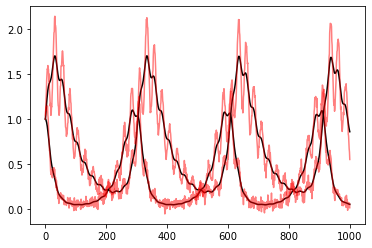

In [18]:
feature_name_list = ["1", "ni", "nn", "ni^2", "nn^2", "ni nn"]
var_list = ["ni", "nn"]

######## LOW MODULATION
print("LOW (5%) MODULATION")
X, t = generate_data(50, 1000, "lotka_volterra", A = 0.05)
plt.plot(X, color="black")
X_dot = ps.SmoothedFiniteDifference()(X, t)
Theta = fTheta(X, u = np.zeros(1))
Theta_sm, X_sm = compute_weak_forms(Theta, X, t)

opt_coefs = np.zeros((X.shape[1], Theta.shape[1]))

print("Denoised: Without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

print("\nDenoised: With ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=300, n_features_to_drop=1,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

print("\nDenoised: Weak without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta_sm, fTheta, X_sm, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]



######## HIGH MODULATION
print("\n\nHIGH (30%) MODULATION")
X, t = generate_data(50, 1000, "lotka_volterra", A = 0.3)
X = add_noise(X, 0.05)
plt.plot(X, color="red", alpha=0.5)
X_dot = ps.SmoothedFiniteDifference()(X, t)
Theta = fTheta(X, u = np.zeros(1))
Theta_sm, X_sm = compute_weak_forms(Theta, X, t)
Theta_sm, X_sm = windowed_generation(Theta, X, t, 1000, 100)

print("5% noise: Without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

print("\n5% noise: With ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta, fTheta, X_dot, X, t, 
                                n_bootstraps=300, n_features_to_drop=1,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]

print("\n5% Noise: Weak without ensembling")
best_model, score, opt_model, opt_score = run_model_search(Theta_sm, fTheta, X_sm, X, t, 
                                n_bootstraps=1, n_features_to_drop=0,
                                feature_names_list=feature_name_list, print_hierarchy=0)
[print_model(opt_model[var], feature_name_list, opt_score[var], var_list[var]) for var in range(X.shape[1])]; print("\n")
[print_model(best_model[var], feature_name_list, score, var_list[var]) for var in range(X.shape[1])]